In [3]:
#imporing the required modules
import cv2
from time import sleep
import requests
import io
import json
import os
import random
from IPython.display import Image
import warnings 
warnings.filterwarnings('ignore')

In [2]:
key = cv2.waitKey(1)
webcam = cv2.VideoCapture(0)
sleep(2)

print("For Recognize Image PRESS 'S'\n"
      "For QUIT PRESS 'Q\n"
      "After run time if 'images.jpg' is still visible,Please re-run the program.\n")

while True:

    try:
        check, frame = webcam.read()
#         print(check)  # prints true as long as the webcam is running
#         print(frame)  # prints matrix values of each framecd
        cv2.imshow("Capturing", frame)
        key = cv2.waitKey(1)
        if key == ord('s'):
            cv2.imwrite(filename='images.jpg', img=frame)
            r = random.randint(1, 20000000)
            img_file = 'images' + str(r) + '.jpg'
            cv2.imwrite(filename='data/' + img_file, img=frame)
            webcam.release()
            print("Processing image...")
            img_ = cv2.imread('images.jpg', cv2.IMREAD_ANYCOLOR)
            print("Image saved!")
            cv2.destroyAllWindows()
            break

        elif key == ord('q'):
            webcam.release()
            cv2.destroyAllWindows()
            break

    except KeyboardInterrupt:
        print("Turning off camera.")
        webcam.release()
        print("Camera off.")
        print("Program ended.")
        cv2.destroyAllWindows()
        break

sleep(2)
resim = "images.jpg"
img = cv2.imread(resim)
print("Picture is Detected")

api = img

# Ocr
url_api = "https://api.ocr.space/parse/image"
_, compressedimage = cv2.imencode(".jpg", api, [1, 90])
file_bytes = io.BytesIO(compressedimage)

result = requests.post(url_api,
                       files={resim: file_bytes},
                       data={"apikey": "helloworld",
                             "language": "eng"})

result = result.content.decode()
print(result)
result = json.loads(result)

parsed_results = result.get("ParsedResults")[0]
text_detected = parsed_results.get("ParsedText")
print(text_detected)

print("Text is writing to file...")
f = open("text_detected.txt", "a+")
f.write(text_detected)
f.close()
print("Operation is successful")


cv2.imshow("roi", api)
cv2.imshow("Img", img)
cv2.waitKey(2000)
os.remove(resim)

For Recognize Image PRESS 'S'
For QUIT PRESS 'Q
After run time if 'images.jpg' is still visible,Please re-run the program.

Processing image...
Image saved!
Picture is Detected
{"ParsedResults":[{"TextOverlay":{"Lines":[],"HasOverlay":false,"Message":"Text overlay is not provided as it is not requested"},"TextOrientation":"0","FileParseExitCode":1,"ParsedText":"WINNING FORMULAS\r\n","ErrorMessage":"","ErrorDetails":""}],"OCRExitCode":1,"IsErroredOnProcessing":false,"ProcessingTimeInMilliseconds":"328","SearchablePDFURL":"Searchable PDF not generated as it was not requested."}
WINNING FORMULAS

Text is writing to file...
Operation is successful


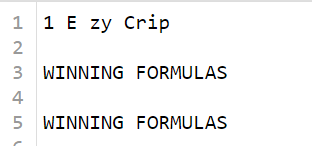

In [4]:
#Display the output Window
Image(filename='OCR_OutPut_Text.png',width=400, height=400)